# Extract [O I] and O I lines

## Library imports and data loading

Copied from the `02-01-Raman-Wings-IR-Source-C` notebook:

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube
import regions
import sys
sys.path.append("../lib")
import moments
import extract

sns.set_context("talk")
sns.set_color_codes()

In [46]:
moments.FIGPATH = Path("../figs")
moments.SAVEPATH = Path("../data")

In [2]:
datapath = Path("/Users/will/Work/Muse-Hii-Data/SMC-NGC-346/")
file2 = "ADP.2016-10-12T05_43_23.882.fits"
cube2 = Cube(str(datapath / file2))

## Use moments to extract the [O I] 6300 line

In [3]:
b1, b2 = 6265, 6275
r1, r2 = 6332, 6345
w1, w2 = 6298, 6308

oi6300cube = cube2.select_lambda(b1-200, r1+200)

In [4]:
# Position of mYSO
x, y = 116, 147
# position of B0 star SSN 43
xb, yb = 95, 163
# position of B0 star SSN 40
xbb, ybb = 121, 133
m = 3

boxes = {
    "SSN 152+168": regions.BoundingBox(
        iymin=y-m, iymax=y+m, ixmin=x-m, ixmax=x+m,
    ),
#    "BG 152+168": regions.BoundingBox(
#        iymin=y-2*m, iymax=y+2*m, ixmin=x-2*m, ixmax=x+2*m,
#    ),
    "SSN 43": regions.BoundingBox(
        iymin=yb-m, iymax=yb+m, ixmin=xb-m, ixmax=xb+m,
    ),
#    "BG 43": regions.BoundingBox(
#        iymin=yb-2*m, iymax=yb+2*m, ixmin=xb-2*m, ixmax=xb+2*m,
#    ),
    "SSN 40": regions.BoundingBox(
        iymin=ybb-m, iymax=ybb+m, ixmin=xbb-m, ixmax=xbb+m,
    ),
#    "BG 40": regions.BoundingBox(
#        iymin=ybb-2*m, iymax=ybb+2*m, ixmin=xbb-2*m, ixmax=xbb+2*m,
#    ),
    "blue": regions.BoundingBox(
        iymin=75, iymax=140, ixmin=15, ixmax=40
    ),
    "red": regions.BoundingBox(
        iymin=200, iymax=250, ixmin=210, ixmax=300
    ),
    "magenta": regions.BoundingBox(
        iymin=10, iymax=50, ixmin=100, ixmax=150
    ),
    "green": regions.BoundingBox(
        iymin=10, iymax=100, ixmin=200, ixmax=300
    ),
    "cyan": regions.BoundingBox(
        iymin=170, iymax=210, ixmin=90, ixmax=120
    ),
}


In [5]:
wavranges = [
    (6150, 6195), (6205, 6250), (6330, 6345), (6400, 6450)
]

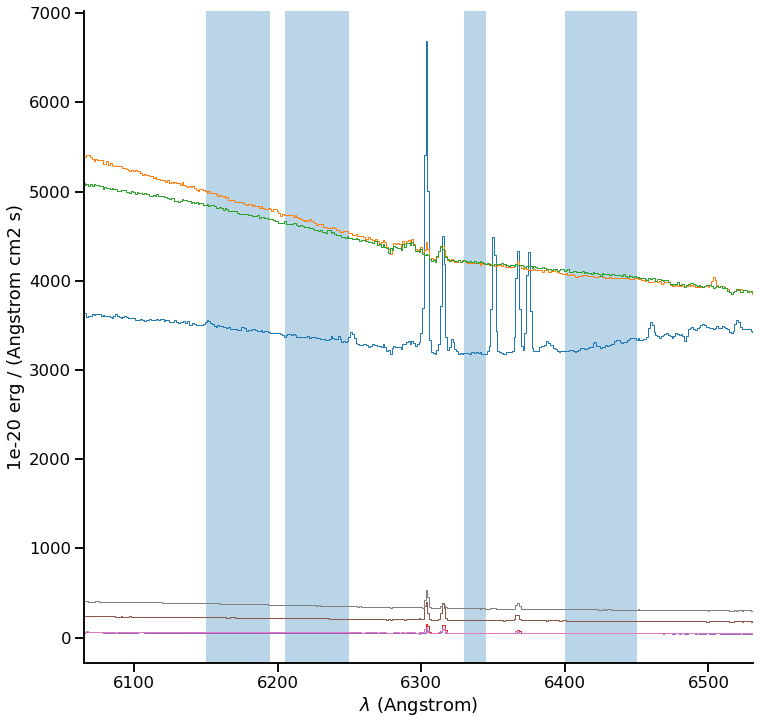

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in boxes.values():
    yslice, xslice = box.slices
    spec = oi6300cube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
sns.despine();

In [7]:
yslice, xslice = boxes["SSN 152+168"].slices
subcube = oi6300cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube, wav_ranges=wavranges, deg=3
)

extract.fit_continuum: row 0


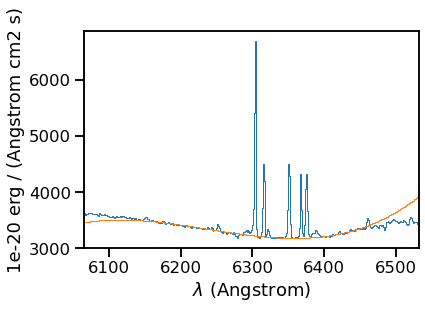

In [8]:
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()

In [9]:
contcube = extract.fit_continuum(
    oi6300cube, wav_ranges=wavranges, deg=3
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


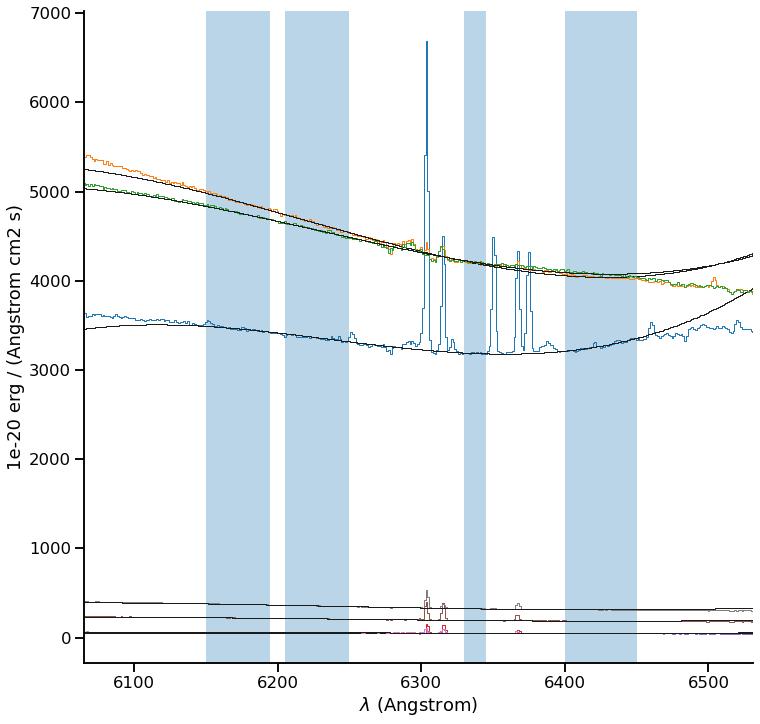

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in boxes.values():
    yslice, xslice = box.slices
    spec = oi6300cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")
    
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
sns.despine();

In [138]:
wavmin, wavmax = wavranges[0][0], wavranges[-1][1]
wavmin, wavmax
prefix = f"../big-data/ngc346-sharp-{wavmin:d}-{wavmax:d}-cube"
prefix

'../big-data/ngc346-sharp-6150-6450'

In [134]:
wide_6300 = (oi6300cube - contcube).select_lambda(wavmin, wavmax)
wide_cont = contcube.select_lambda(wavmin, wavmax)

In [141]:
wide_6300.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
    )
wide_cont.write(
    f"{prefix}-cont.fits",
    savemask="nan",
    )

In [12]:

mom6300 = moments.find_moments(
    wide_6300.select_lambda(w1, w2)
)

../lib/moments.py:35: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [13]:
mom_pars_6300 = dict(
    restwav=6300.30,
    irange=[-150, 4.0e4],
    vrange=[85, 255],
    srange=[30, 150],    
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


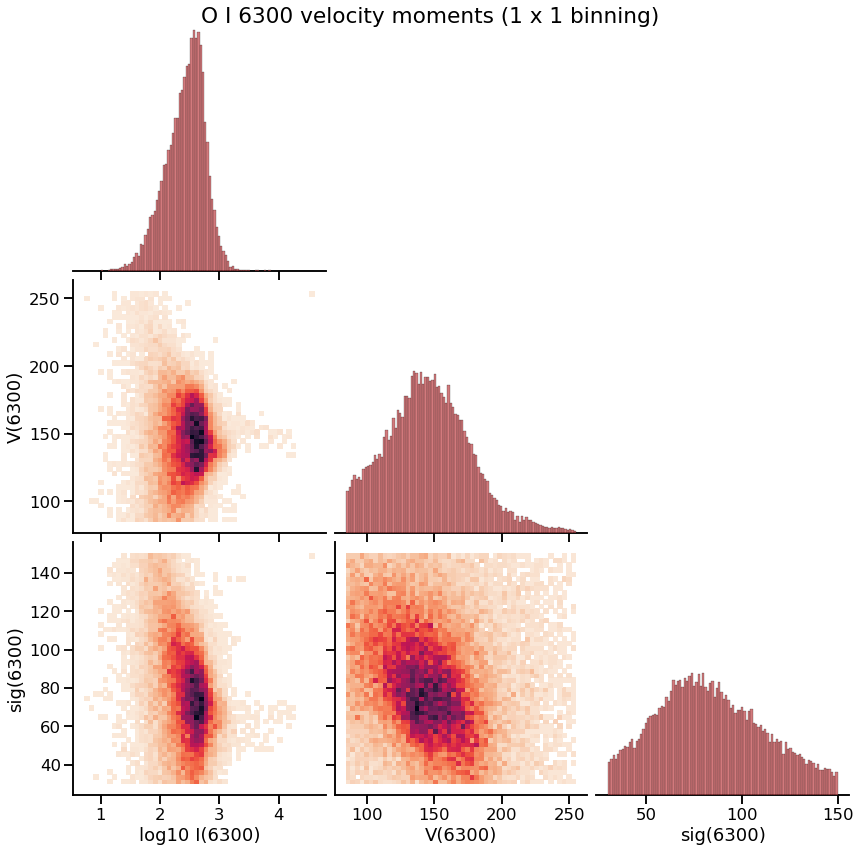

In [48]:
plot_pars_6300=dict(
    ilabel="O I",
    label="6300",
    flabel="ngc346-oi",
    **mom_pars_6300,
)
g = moments.moments_corner_plot(
    mom6300, rebin=1, **plot_pars_6300
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


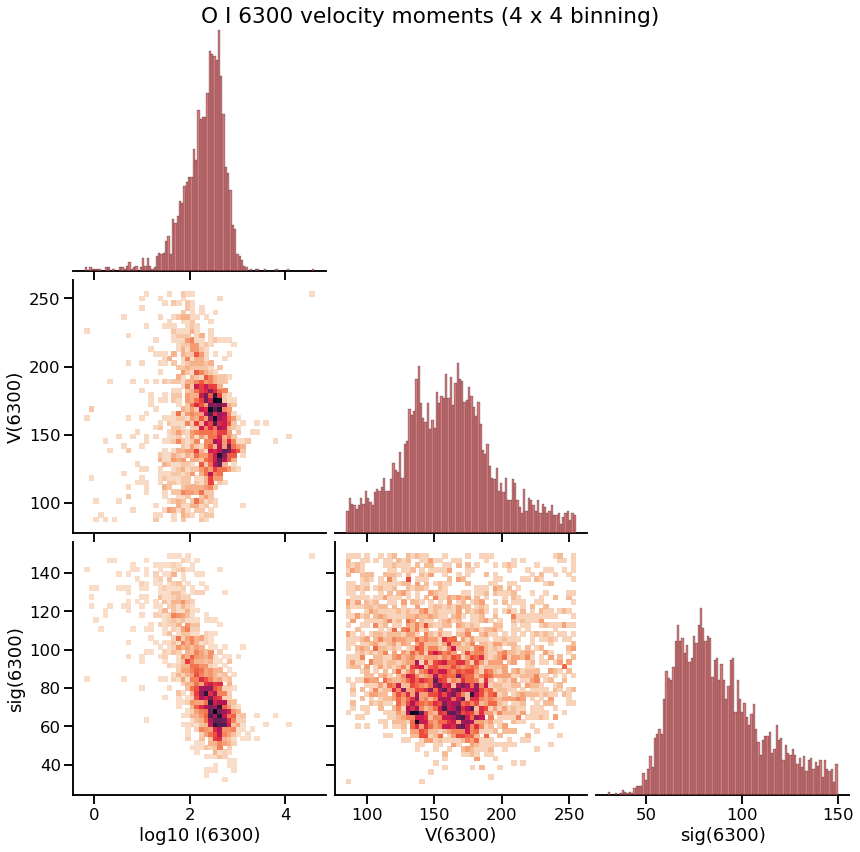

In [49]:
plot_pars_6300=dict(
    ilabel="O I",
    label="6300",
    flabel="ngc346-oi",
    **mom_pars_6300,
)
g = moments.moments_corner_plot(
    mom6300, rebin=4, **plot_pars_6300
)

It looks like the possible symptoms of oversubtracted sky.

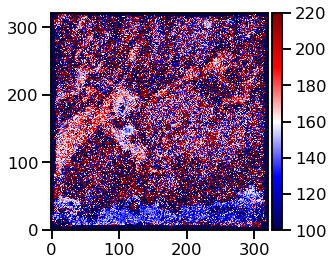

In [16]:
(3e5*(mom6300[1] / 6300.30 - 1.0)).rebin(1).plot(
    vmin=100, vmax=220, 
    cmap="seismic", 
    colorbar="v",
)

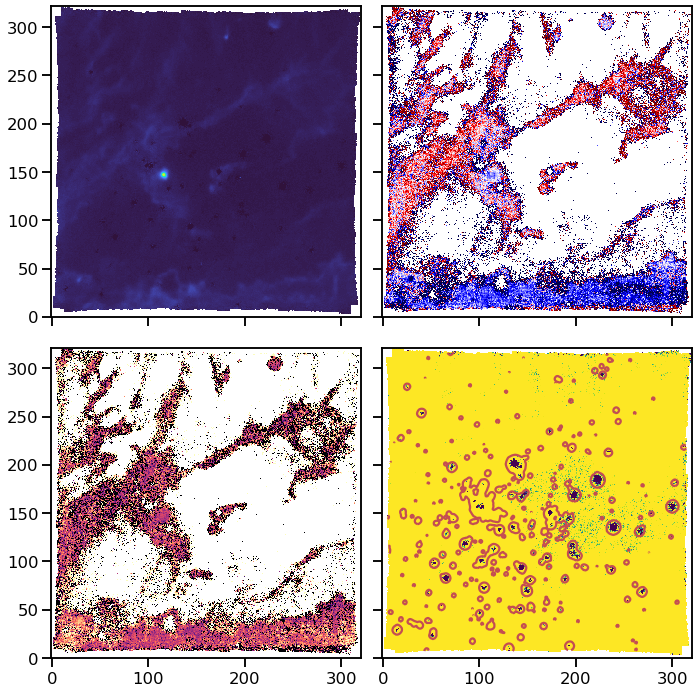

In [65]:
fig, axes = plt.subplots(
    2, 2, 
    figsize=(10, 10),
    sharex=True, sharey=True,
)

imap = mom6300[0].copy()
vmap = 3e5*(mom6300[1] / 6300.30 - 1.0)
smap = 3e5*(mom6300[2] / 6300.30)

m = imap.data > 10.

vmap.mask = vmap.mask | (~m)
smap.mask = smap.mask | (~m)

imap.rebin(1).plot(
    vmin=-500, vmax=3e4, 
    cmap="turbo", 
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=100, vmax=220, 
    cmap="seismic", 
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=0, vmax=120, 
    cmap="magma", 
    ax=axes[1, 0],
)

imap.rebin(1).plot(
    vmin=-350, vmax=-200, 
    cmap="viridis", 
    ax=axes[1, 1],
)
bg_6300 = contcube.select_lambda(w1, w2).mean(axis=0)
axes[1, 1].contour(
    bg_6300.data,
    levels=[300],
    colors="r",
)

fig.tight_layout();

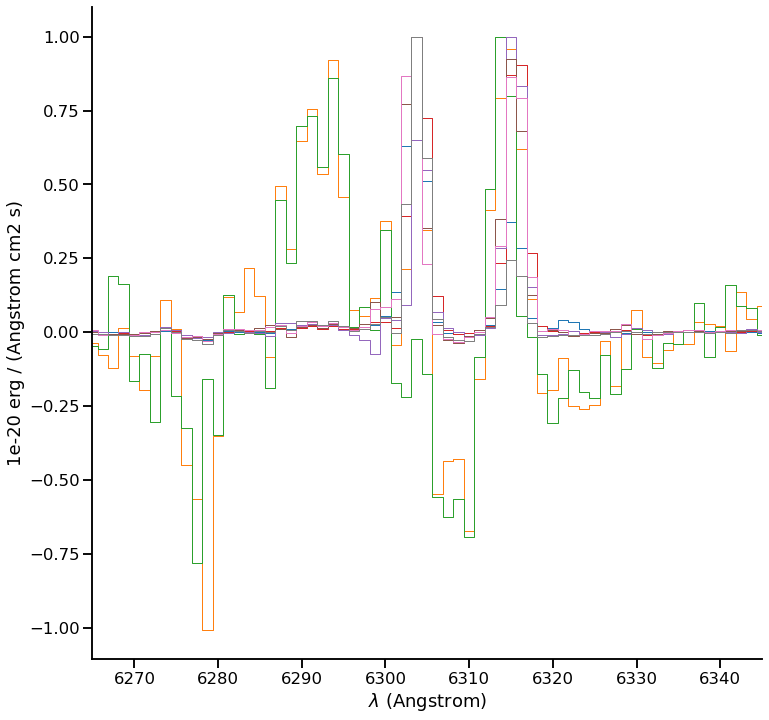

In [66]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in boxes.values():
    yslice, xslice = box.slices
    spec = wide_6300[:, yslice, xslice].mean(axis=(1, 2))
    (spec / spec.data.max()).plot()
    
sns.despine();

In [67]:
msky = (imap.data < -100) & (imap.data > -200) & (bg_6300.data < 300)
msky[310:, :] = False
msky[:, 310:] = False
msky[:10, :] = False
msky[:, :10] = False

In [68]:
msky.sum(), np.where(msky)

(17351,
 (array([ 10,  32,  33, ..., 309, 309, 309]),
  array([224, 123, 122, ..., 304, 305, 309])))

In [69]:
core_6300 = wide_6300.select_lambda(w1, w2)
sky_6300 = core_6300.copy() 
sky_6300.mask = sky_6300.mask | ~msky[None, : :]

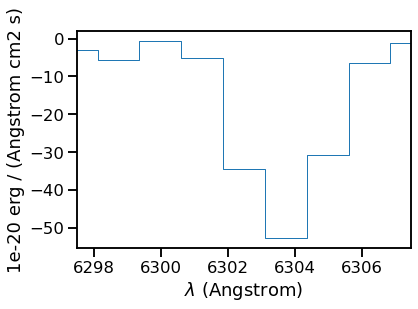

In [70]:
sky_6300.mean(axis=(1, 2)).plot()

In [71]:
corr_6300 = core_6300 - sky_6300.mean(axis=(1, 2))

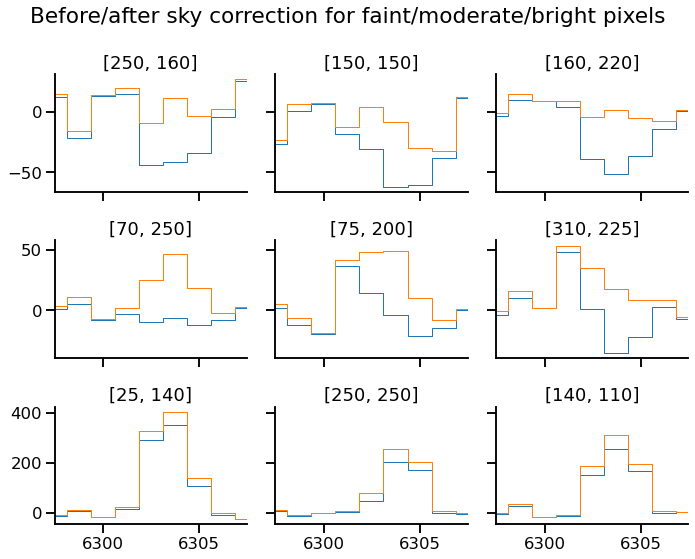

In [72]:
testpixels = [
    [250, 160], [150, 150], [160, 220],
    [70, 250], [75, 200], [310, 225],
    [25, 140], [250, 250], [140, 110], #[180, 290],
]
fig, axes = plt.subplots(
    3, 3, 
    figsize=(10, 8), 
    sharex=True,
    sharey="row",
)
for (j, i), ax in zip(testpixels, axes.flat):
    core_6300[:, j, i].plot(ax=ax)
    corr_6300[:, j, i].plot(ax=ax) 
    ax.set(xlabel="", ylabel="")
    ax.set_title(f"[{j}, {i}]")
fig.suptitle(
    "Before/after sky correction for faint/moderate/bright pixels"
)
sns.despine()
fig.tight_layout();

In [73]:
mom6300c = moments.find_moments(corr_6300)

../lib/moments.py:35: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


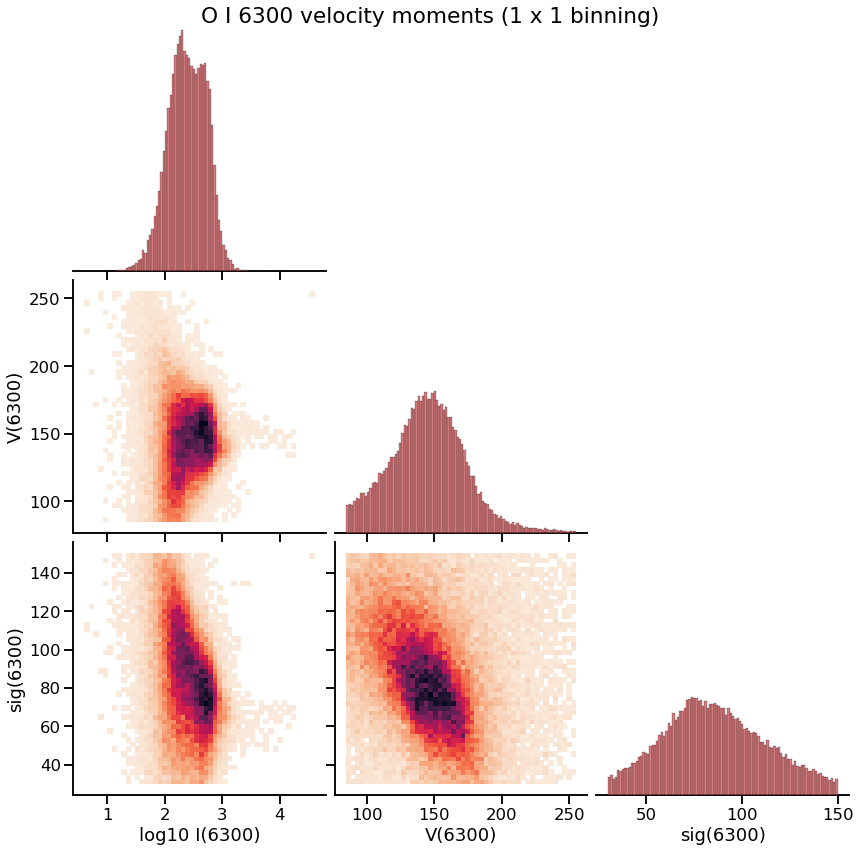

In [74]:
g = moments.moments_corner_plot(
    mom6300c, rebin=1, **plot_pars_6300
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


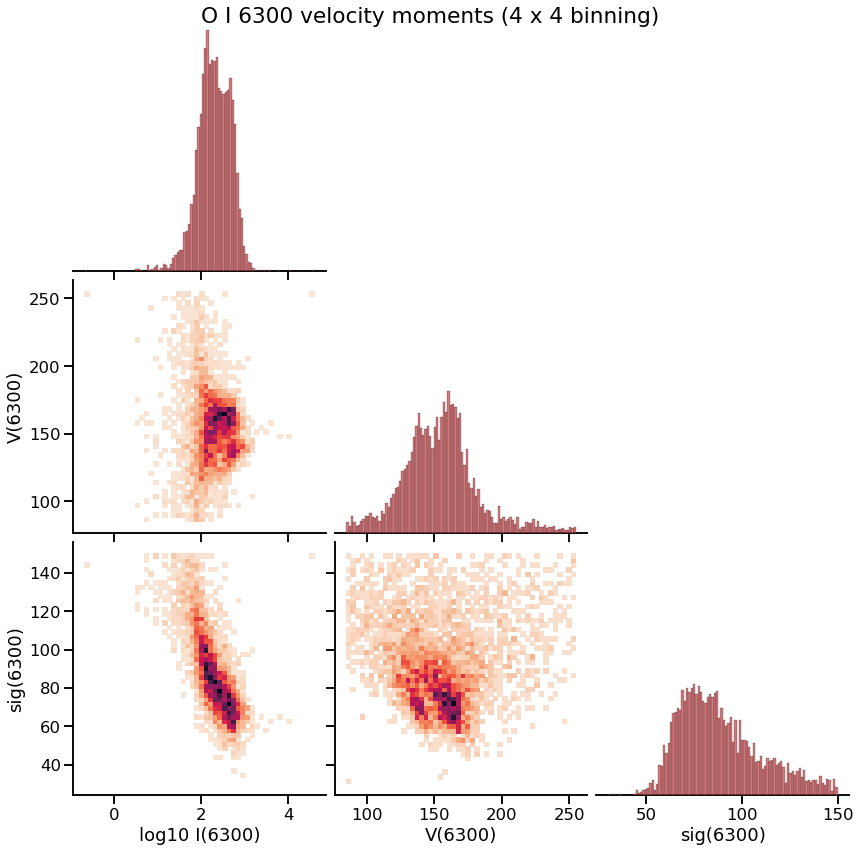

In [75]:
g = moments.moments_corner_plot(
    mom6300c, rebin=4, **plot_pars_6300
)

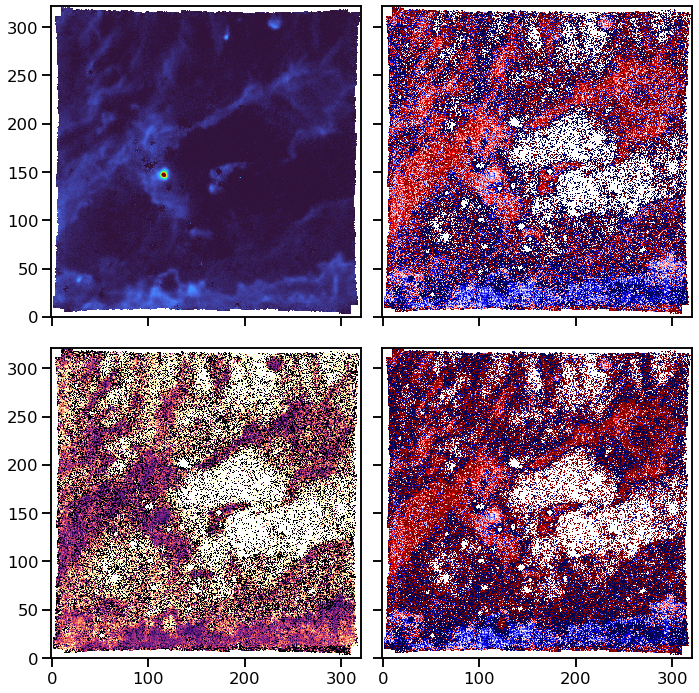

In [77]:
fig, axes = plt.subplots(
    2, 2, 
    figsize=(10, 10),
    sharex=True, sharey=True,
)

imap = mom6300c[0].copy()
vmap = 3e5*(mom6300c[1] / 6300.30 - 1.0)
smap = 3e5*(mom6300c[2] / 6300.30)

m = imap.data > 0.

vmap.mask = vmap.mask | (~m)
smap.mask = smap.mask | (~m)

vmap_old = 3e5*(mom6300[1] / 6300.30 - 1.0)
vmap_old.mask = vmap_old.mask | (~m)


imap.rebin(1).plot(
    vmin=0, vmax=1e4, 
    cmap="turbo", 
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=120, vmax=180, 
    cmap="seismic", 
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=40, vmax=120, 
    cmap="magma", 
    ax=axes[1, 0],
)

vmap_old.rebin(1).plot(
    vmin=120, vmax=180, 
    cmap="seismic", 
    ax=axes[1, 1],
)


fig.tight_layout();

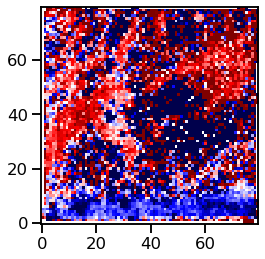

In [78]:
vmap.rebin(4).plot(
    vmin=120, vmax=180, 
    cmap="seismic", 
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


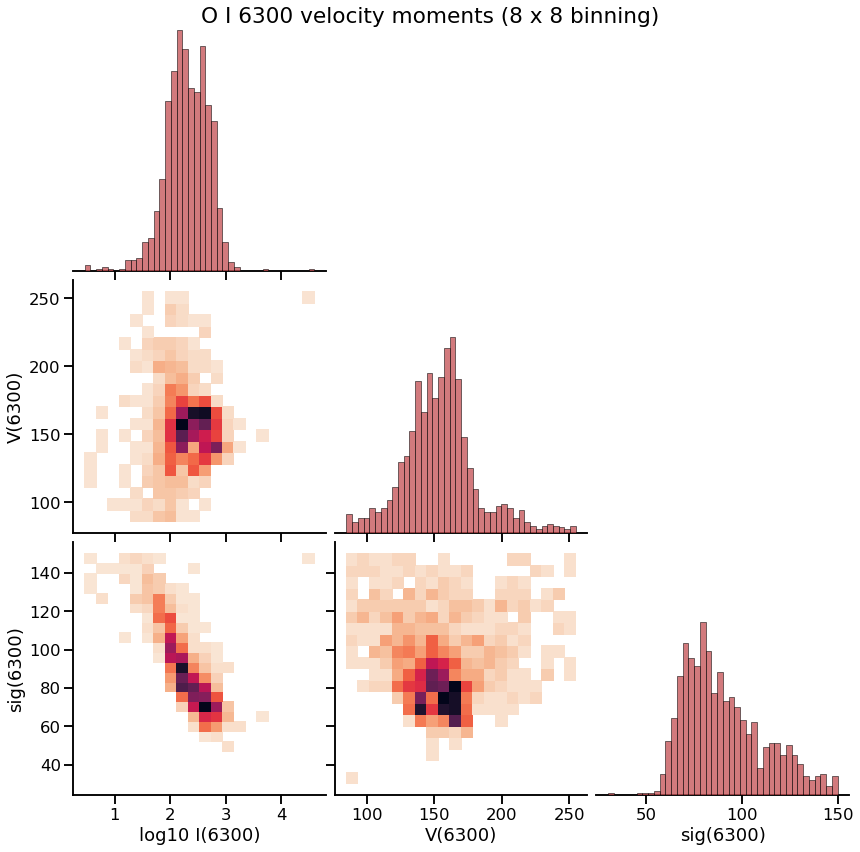

In [79]:
g = moments.moments_corner_plot(
    mom6300c, rebin=8, **plot_pars_6300,
    hist_bins=40,
    image_bins=20,    
);

There is clearly a problem still with the fainter pixels.  Witness the trend of sig with intensity.  But theis is not so important for studying the brighter parts.

In [80]:
mom_pars_6300 = dict(
    restwav=6300.30,
    irange=[-150, 4.0e4],
    vrange=[85, 255],
    srange=[30, 150],    
)
moments.save_moments_to_fits(
    mom6300c,
    label="6300",
    flabel="ngc346-sharp-oi",
    **mom_pars_6300,
)

In [86]:
wide_6300.wave.coord()

array([6264.97314453, 6266.22314453, 6267.47314453, 6268.72314453,
       6269.97314453, 6271.22314453, 6272.47314453, 6273.72314453,
       6274.97314453, 6276.22314453, 6277.47314453, 6278.72314453,
       6279.97314453, 6281.22314453, 6282.47314453, 6283.72314453,
       6284.97314453, 6286.22314453, 6287.47314453, 6288.72314453,
       6289.97314453, 6291.22314453, 6292.47314453, 6293.72314453,
       6294.97314453, 6296.22314453, 6297.47314453, 6298.72314453,
       6299.97314453, 6301.22314453, 6302.47314453, 6303.72314453,
       6304.97314453, 6306.22314453, 6307.47314453, 6308.72314453,
       6309.97314453, 6311.22314453, 6312.47314453, 6313.72314453,
       6314.97314453, 6316.22314453, 6317.47314453, 6318.72314453,
       6319.97314453, 6321.22314453, 6322.47314453, 6323.72314453,
       6324.97314453, 6326.22314453, 6327.47314453, 6328.72314453,
       6329.97314453, 6331.22314453, 6332.47314453, 6333.72314453,
       6334.97314453, 6336.22314453, 6337.47314453, 6338.72314

In [87]:
core_6363 = (oi6300cube - contcube).select_lambda(6362, 6372)
mom6363 = moments.find_moments(core_6363)

../lib/moments.py:35: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [88]:
mom_pars_6363 = dict(
    restwav=6363.78,
    irange=[-50, 1.3e4],
    vrange=[85, 255],
    srange=[30, 150],    
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


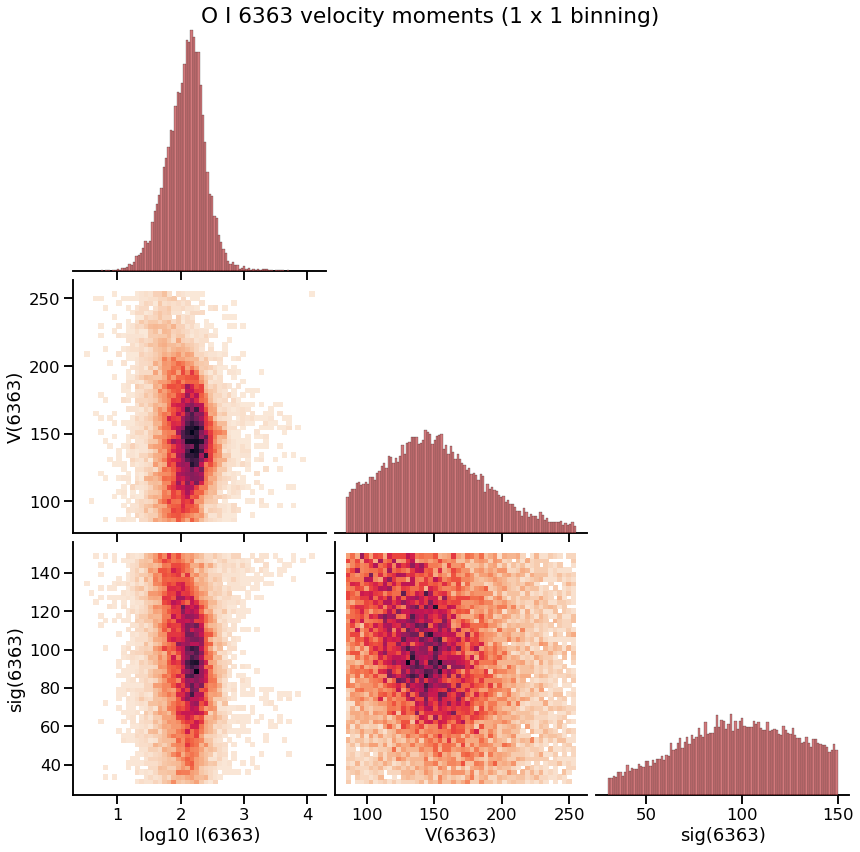

In [89]:
plot_pars_6363=dict(
    ilabel="O I",
    label="6363",
    flabel="ngc346-oi",
    **mom_pars_6363,
)
g = moments.moments_corner_plot(
    mom6363, rebin=1, **plot_pars_6363,
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


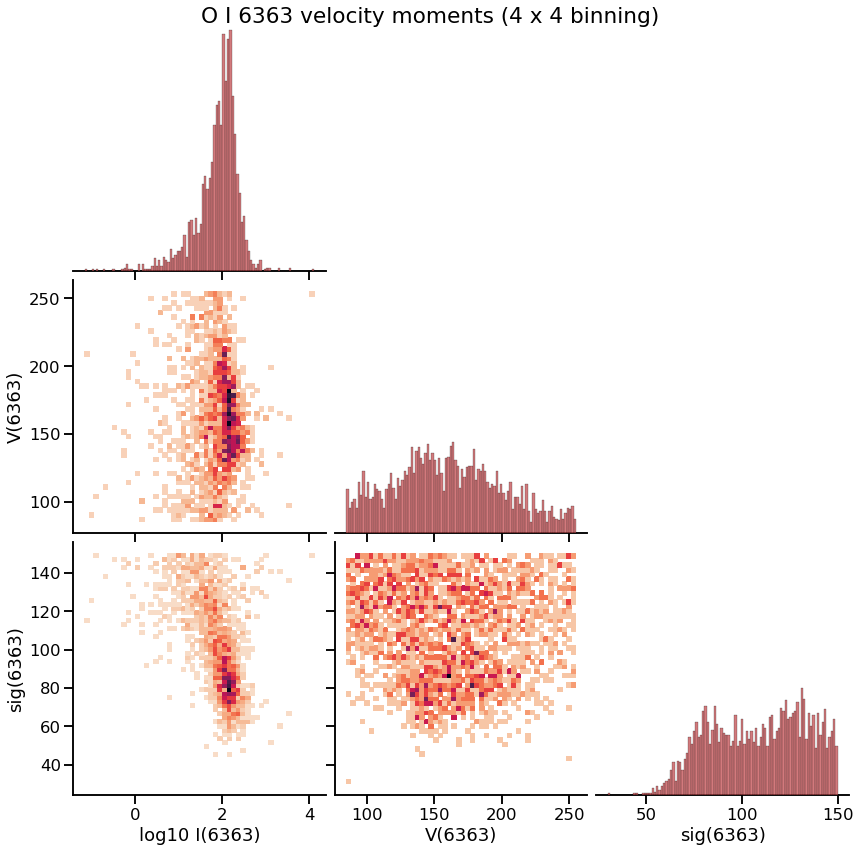

In [90]:
g = moments.moments_corner_plot(
    mom6363, rebin=4, **plot_pars_6363,
)

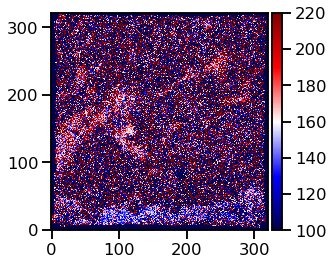

In [91]:
(3e5*(mom6363[1] / 6363.78 - 1.0)).rebin(1).plot(
    vmin=100, vmax=220, 
    cmap="seismic", 
    colorbar="v",
)

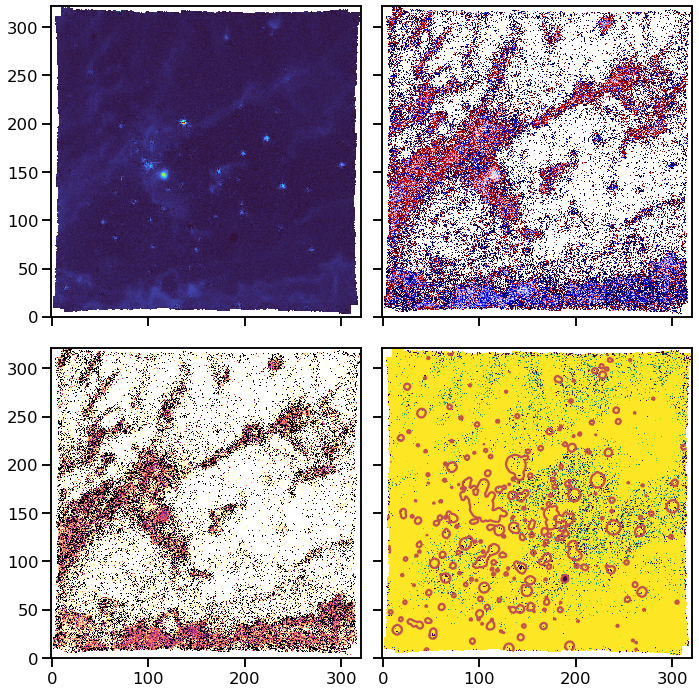

In [93]:
fig, axes = plt.subplots(
    2, 2, 
    figsize=(10, 10),
    sharex=True, sharey=True,
)

imap = mom6363[0].copy()
vmap = 3e5*(mom6363[1] / 6363.78 - 1.0)
smap = 3e5*(mom6363[2] / 6363.78)

m = imap.data > 10.

vmap.mask = vmap.mask | (~m)
smap.mask = smap.mask | (~m)

imap.rebin(1).plot(
    vmin=-500/3, vmax=3e4/3, 
    cmap="turbo", 
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=100, vmax=220, 
    cmap="seismic", 
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=0, vmax=120, 
    cmap="magma", 
    ax=axes[1, 0],
)

imap.rebin(1).plot(
    vmin=-350/3, vmax=-200/3, 
    cmap="viridis", 
    ax=axes[1, 1],
)
bg_6363 = contcube.select_lambda(6362, 6372).mean(axis=0)
axes[1, 1].contour(
    bg_6363.data,
    levels=[300],
    colors="r",
)

fig.tight_layout();

In [94]:
sky_6363 = core_6363.copy() 
sky_6363.mask = sky_6363.mask | ~msky[None, : :]

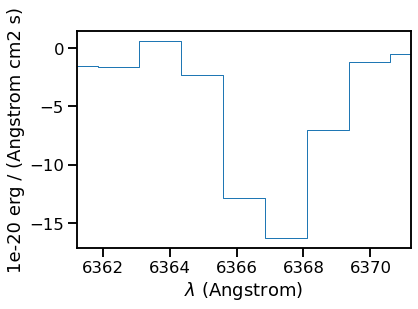

In [95]:
sky_6363.mean(axis=(1, 2)).plot()

In [97]:
corr_6363 = core_6363 - sky_6363.mean(axis=(1, 2))

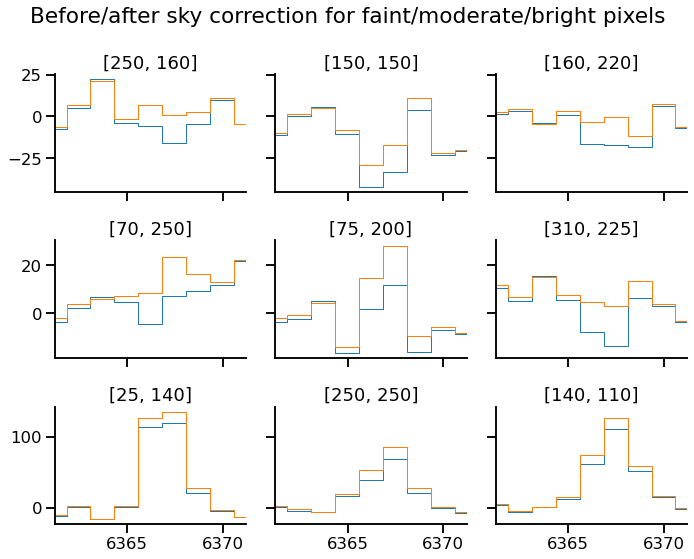

In [98]:
testpixels = [
    [250, 160], [150, 150], [160, 220],
    [70, 250], [75, 200], [310, 225],
    [25, 140], [250, 250], [140, 110], #[180, 290],
]
fig, axes = plt.subplots(
    3, 3, 
    figsize=(10, 8), 
    sharex=True,
    sharey="row",
)
for (j, i), ax in zip(testpixels, axes.flat):
    core_6363[:, j, i].plot(ax=ax)
    corr_6363[:, j, i].plot(ax=ax) 
    ax.set(xlabel="", ylabel="")
    ax.set_title(f"[{j}, {i}]")
fig.suptitle(
    "Before/after sky correction for faint/moderate/bright pixels"
)
sns.despine()
fig.tight_layout();

In [99]:
mom6363c = moments.find_moments(corr_6363)

../lib/moments.py:35: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


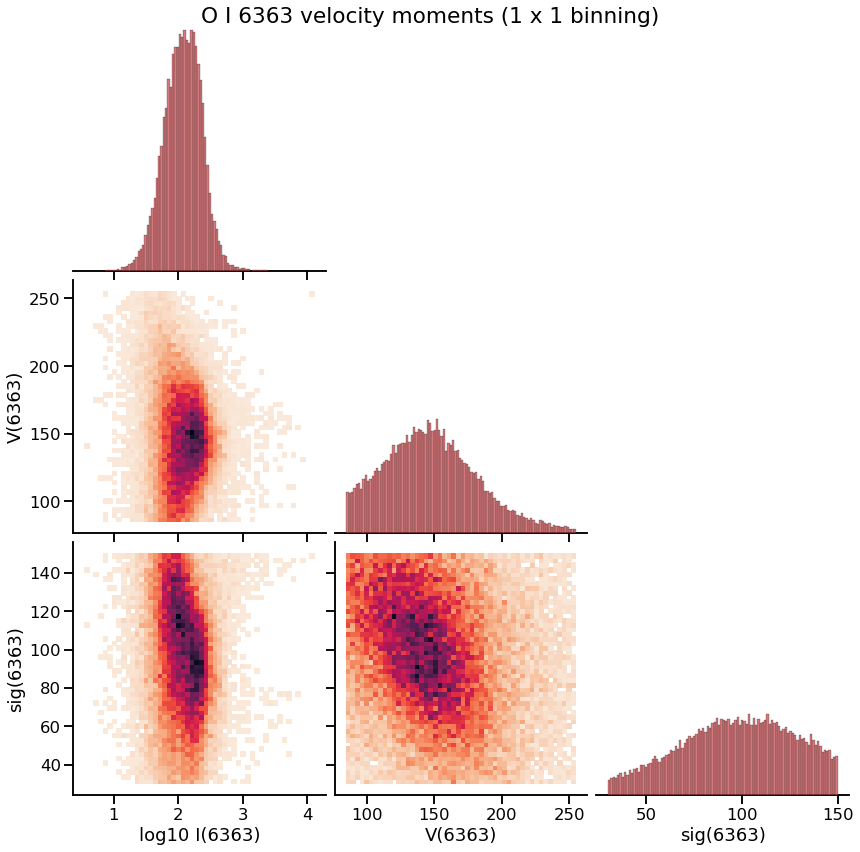

In [100]:
g = moments.moments_corner_plot(
    mom6363c, rebin=1, **plot_pars_6363
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


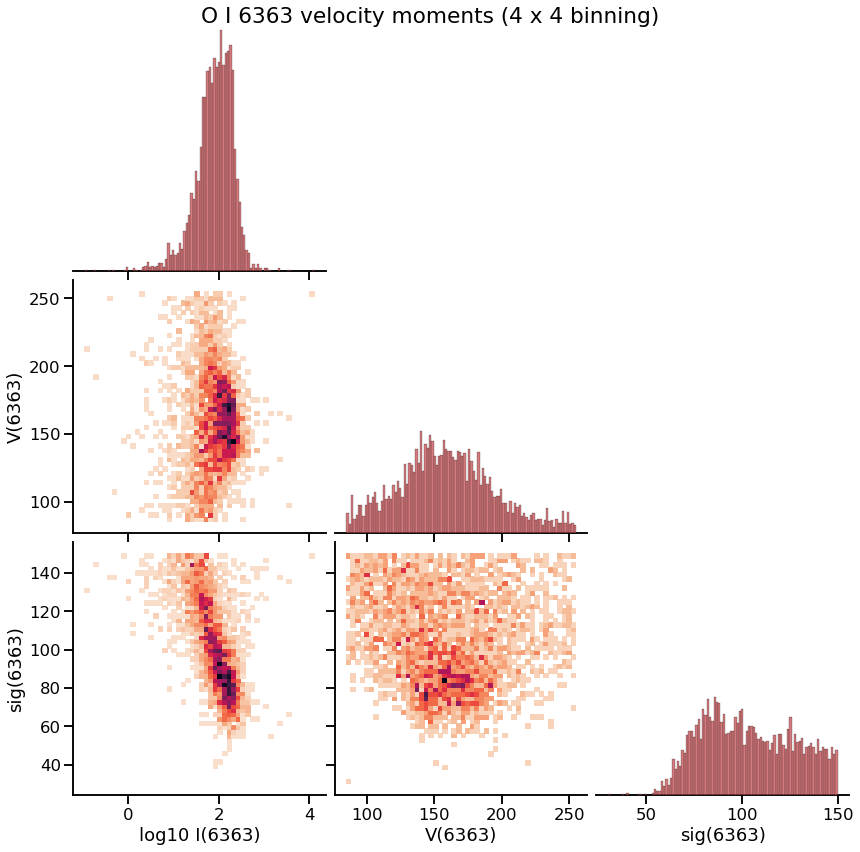

In [102]:
g = moments.moments_corner_plot(
    mom6363c, rebin=4, **plot_pars_6363
)

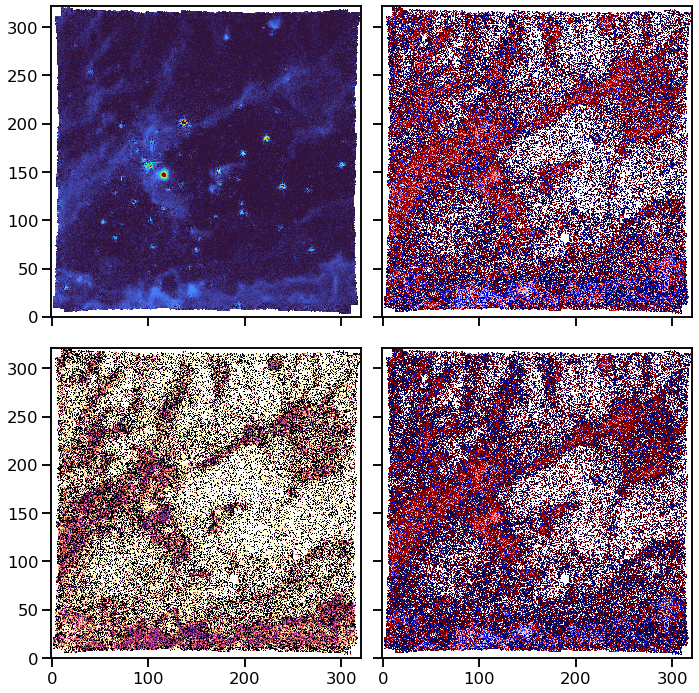

In [103]:
fig, axes = plt.subplots(
    2, 2, 
    figsize=(10, 10),
    sharex=True, sharey=True,
)

imap = mom6363c[0].copy()
vmap = 3e5*(mom6363c[1] / 6363.78 - 1.0)
smap = 3e5*(mom6363c[2] / 6363.78)

m = imap.data > 0.

vmap.mask = vmap.mask | (~m)
smap.mask = smap.mask | (~m)

vmap_old = 3e5*(mom6363[1] / 6363.78 - 1.0)
vmap_old.mask = vmap_old.mask | (~m)


imap.rebin(1).plot(
    vmin=0, vmax=1e4/3, 
    cmap="turbo", 
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=120, vmax=180, 
    cmap="seismic", 
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=40, vmax=120, 
    cmap="magma", 
    ax=axes[1, 0],
)

vmap_old.rebin(1).plot(
    vmin=120, vmax=180, 
    cmap="seismic", 
    ax=axes[1, 1],
)


fig.tight_layout();

In [105]:
mom_pars_6363 = dict(
    restwav=6363.78,
    irange=[-150, 1.3e4],
    vrange=[85, 255],
    srange=[30, 150],    
)
moments.save_moments_to_fits(
    mom6363c,
    label="6363",
    flabel="ngc346-sharp-oi",
    **mom_pars_6363,
)

## Other lines in the wav range: [S III] and Si II

In [107]:
core_6312 = (oi6300cube - contcube).select_lambda(6311, 6321)
mom6312 = moments.find_moments(core_6312)

../lib/moments.py:35: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [108]:
mom_pars_6312 = dict(
    restwav=6312.06,
    irange=[-150, 4e4],
    vrange=[85, 255],
    srange=[30, 150],    
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


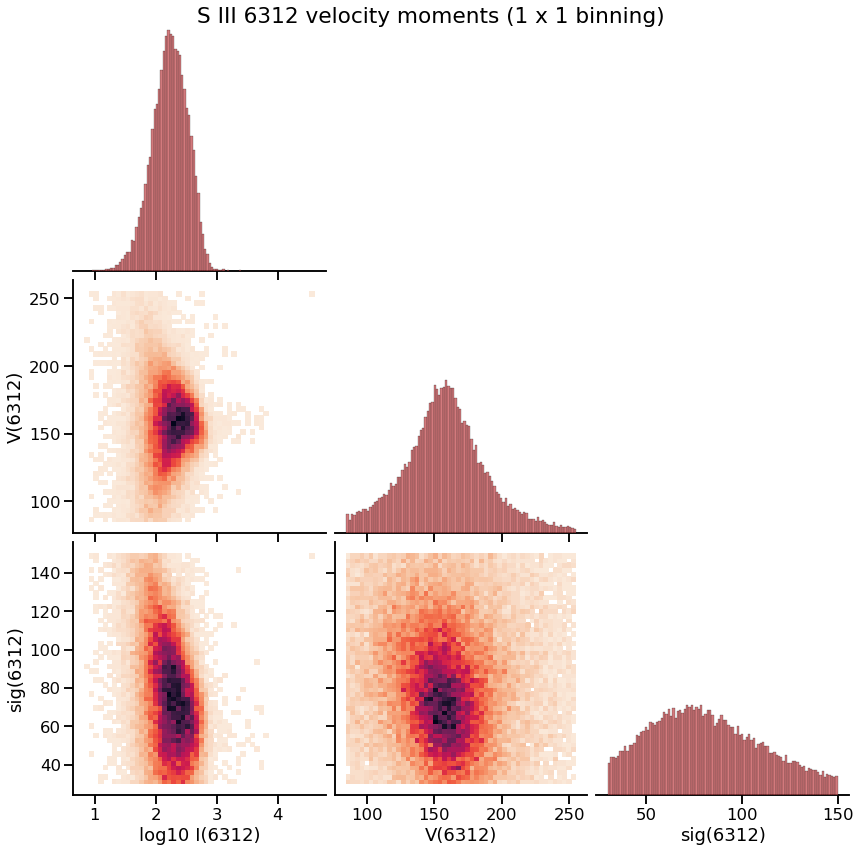

In [109]:
plot_pars_6312=dict(
    ilabel="S III",
    label="6312",
    flabel="ngc346-siii",
    **mom_pars_6312,
)
g = moments.moments_corner_plot(
    mom6312, rebin=1, **plot_pars_6312,
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


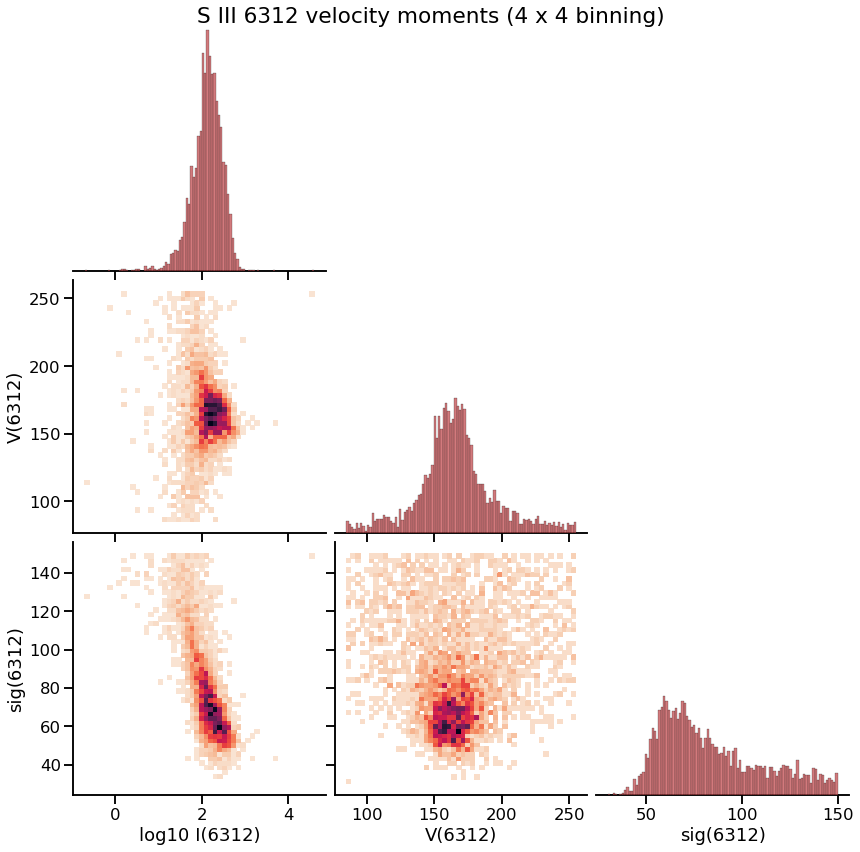

In [110]:
g = moments.moments_corner_plot(
    mom6312, rebin=4, **plot_pars_6312,
)

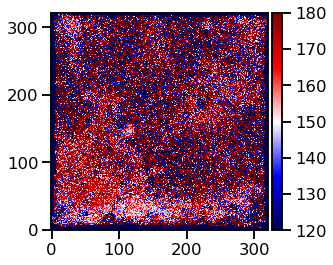

In [112]:
(3e5*(mom6312[1] / 6312.06 - 1.0)).rebin(1).plot(
    vmin=120, vmax=180, 
    cmap="seismic", 
    colorbar="v",
)

In [113]:
moments.save_moments_to_fits(
    mom6312,
    label="6312",
    flabel="ngc346-sharp-siii",
    **mom_pars_6312,
)

Si II 6347

In [114]:
core_6347 = (oi6300cube - contcube).select_lambda(6345, 6355)
mom6347 = moments.find_moments(core_6347)

../lib/moments.py:35: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [116]:
mom_pars_6347 = dict(
    restwav=6347.11,
    irange=[-150, 4e4],
    vrange=[85, 255],
    srange=[30, 150],    
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


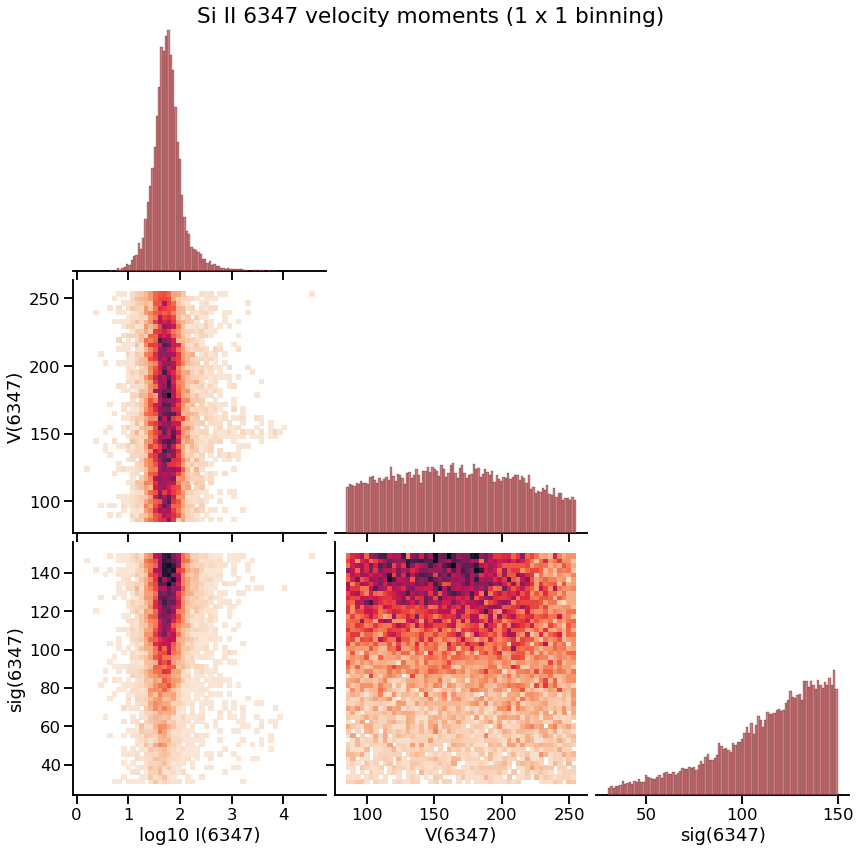

In [117]:
plot_pars_6347=dict(
    ilabel="Si II",
    label="6347",
    flabel="ngc346-si-ii",
    **mom_pars_6347,
)
g = moments.moments_corner_plot(
    mom6347, rebin=1, **plot_pars_6347,
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


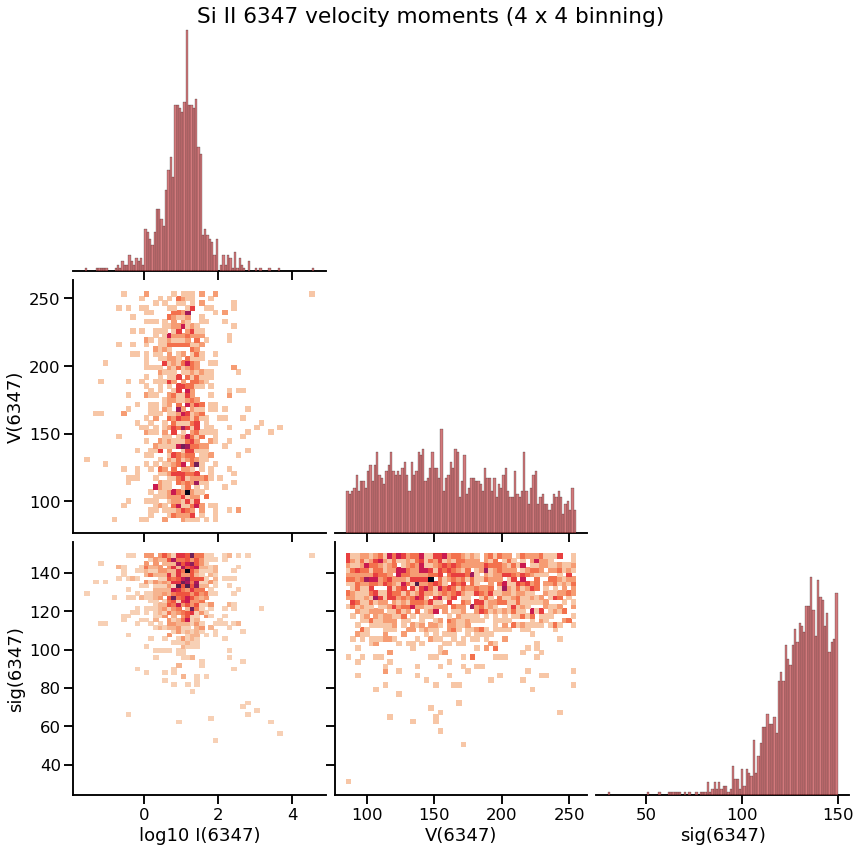

In [118]:
g = moments.moments_corner_plot(
    mom6347, rebin=4, **plot_pars_6347,
)

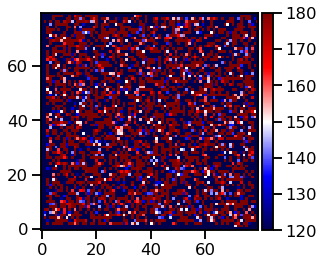

In [123]:
(3e5*(mom6347[1] / 6347.11 - 1.0)).rebin(4).plot(
    vmin=120, vmax=180, 
    cmap="seismic", 
    colorbar="v",
)

In [124]:
moments.save_moments_to_fits(
    mom6347,
    label="6347",
    flabel="ngc346-sharp-si-ii",
    **mom_pars_6347,
)

In [142]:
core_6371 = (oi6300cube - contcube).select_lambda(6371, 6381)
mom6371 = moments.find_moments(core_6371)

../lib/moments.py:35: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [145]:
mom_pars_6371 = dict(
    restwav=6371.36,
    irange=[-150, 4e4],
    vrange=[45, 305],
    srange=[30, 200],    
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


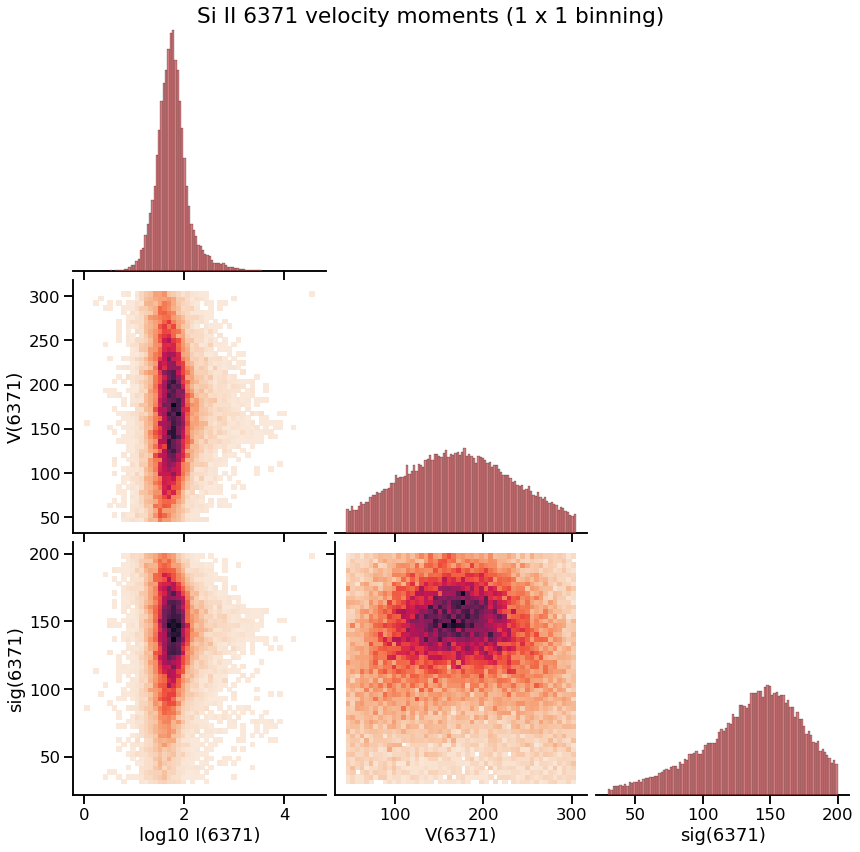

In [146]:
plot_pars_6371=dict(
    ilabel="Si II",
    label="6371",
    flabel="ngc346-si-ii",
    **mom_pars_6371,
)
g = moments.moments_corner_plot(
    mom6371, rebin=1, **plot_pars_6371,
)

../lib/moments.py:111: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
../lib/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


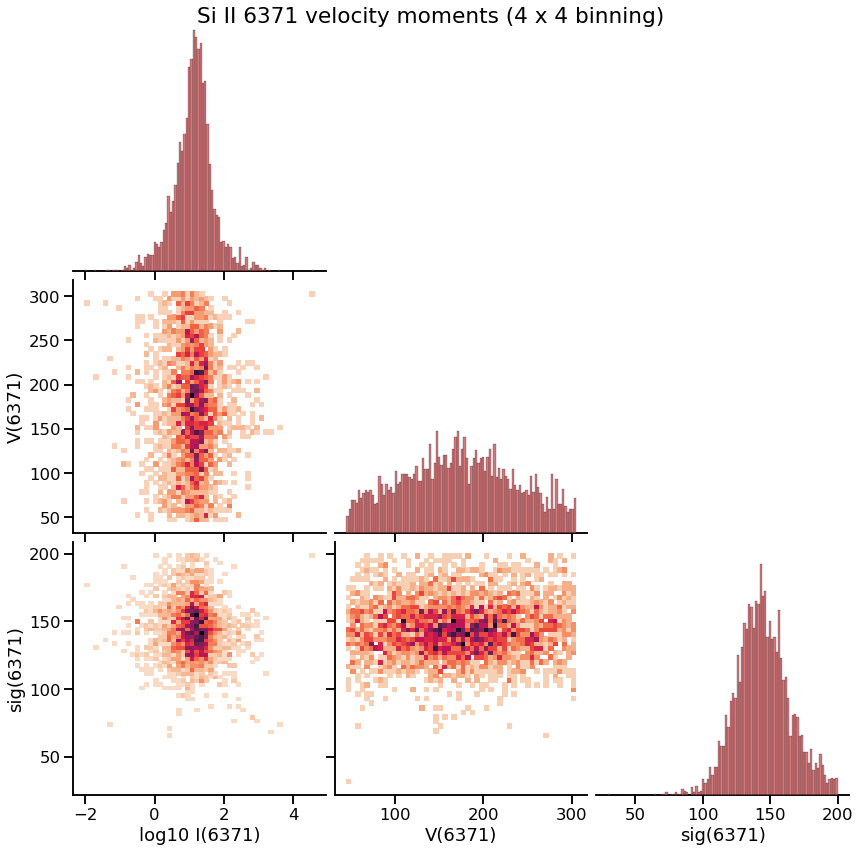

In [147]:
g = moments.moments_corner_plot(
    mom6371, rebin=4, **plot_pars_6371,
)

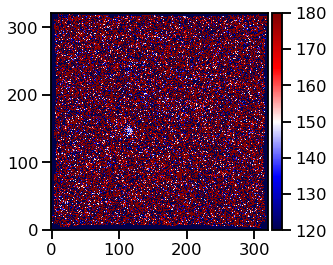

In [150]:
(3e5*(mom6371[1] / 6371.36 - 1.0)).rebin(1).plot(
    vmin=120, vmax=180, 
    cmap="seismic", 
    colorbar="v",
)

In [151]:
moments.save_moments_to_fits(
    mom6371,
    label="6371",
    flabel="ngc346-sharp-si-ii",
    **mom_pars_6371,
)

~~Surprisingly, Si II 6371 has a diffuse component, but Si II 6347 does not~~  No, that was just because we were contaminated by [O I] 6363.  I have fixed that now.